In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import os
print(os.getcwd())

D:\docs_mariana\ProjetosGit\averiguacao_cadastral\Analises_Mariana\Analises_modelo


In [3]:
# Load the datasets
import pandas as pd

# Usando o caminho absoluto
df_balanceado = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data_modelo/df_modelo_balanceado.csv')

In [4]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,...,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,0.0,3,3290.0,...,0.333333,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,0.0,8,1774.0,...,0.000000,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,205.0,2,1966.0,...,0.000000,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,0.0,2,812.0,...,0.000000,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,0.0,3,5772.0,...,0.000000,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [5]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96792 entries, 0 to 96791
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uf_ibge                          96792 non-null  int64  
 1   classf                           96792 non-null  int64  
 2   id_familia                       96792 non-null  int64  
 3   cod_local_domic_fam              96792 non-null  float64
 4   qtd_comodos_domic_fam            96792 non-null  float64
 5   cod_material_piso_fam            96792 non-null  float64
 6   cod_iluminacao_domic_fam         96792 non-null  float64
 7   ind_parc_mds_fam                 96792 non-null  float64
 8   qtde_pessoas                     96792 non-null  int64  
 9   dias_cadastramento               96791 non-null  float64
 10  dias_atualizacao                 96792 non-null  int64  
 11  classe_renda                     96792 non-null  int64  
 12  rf_idade          

In [6]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pc

## Identificando as features com grande correlação

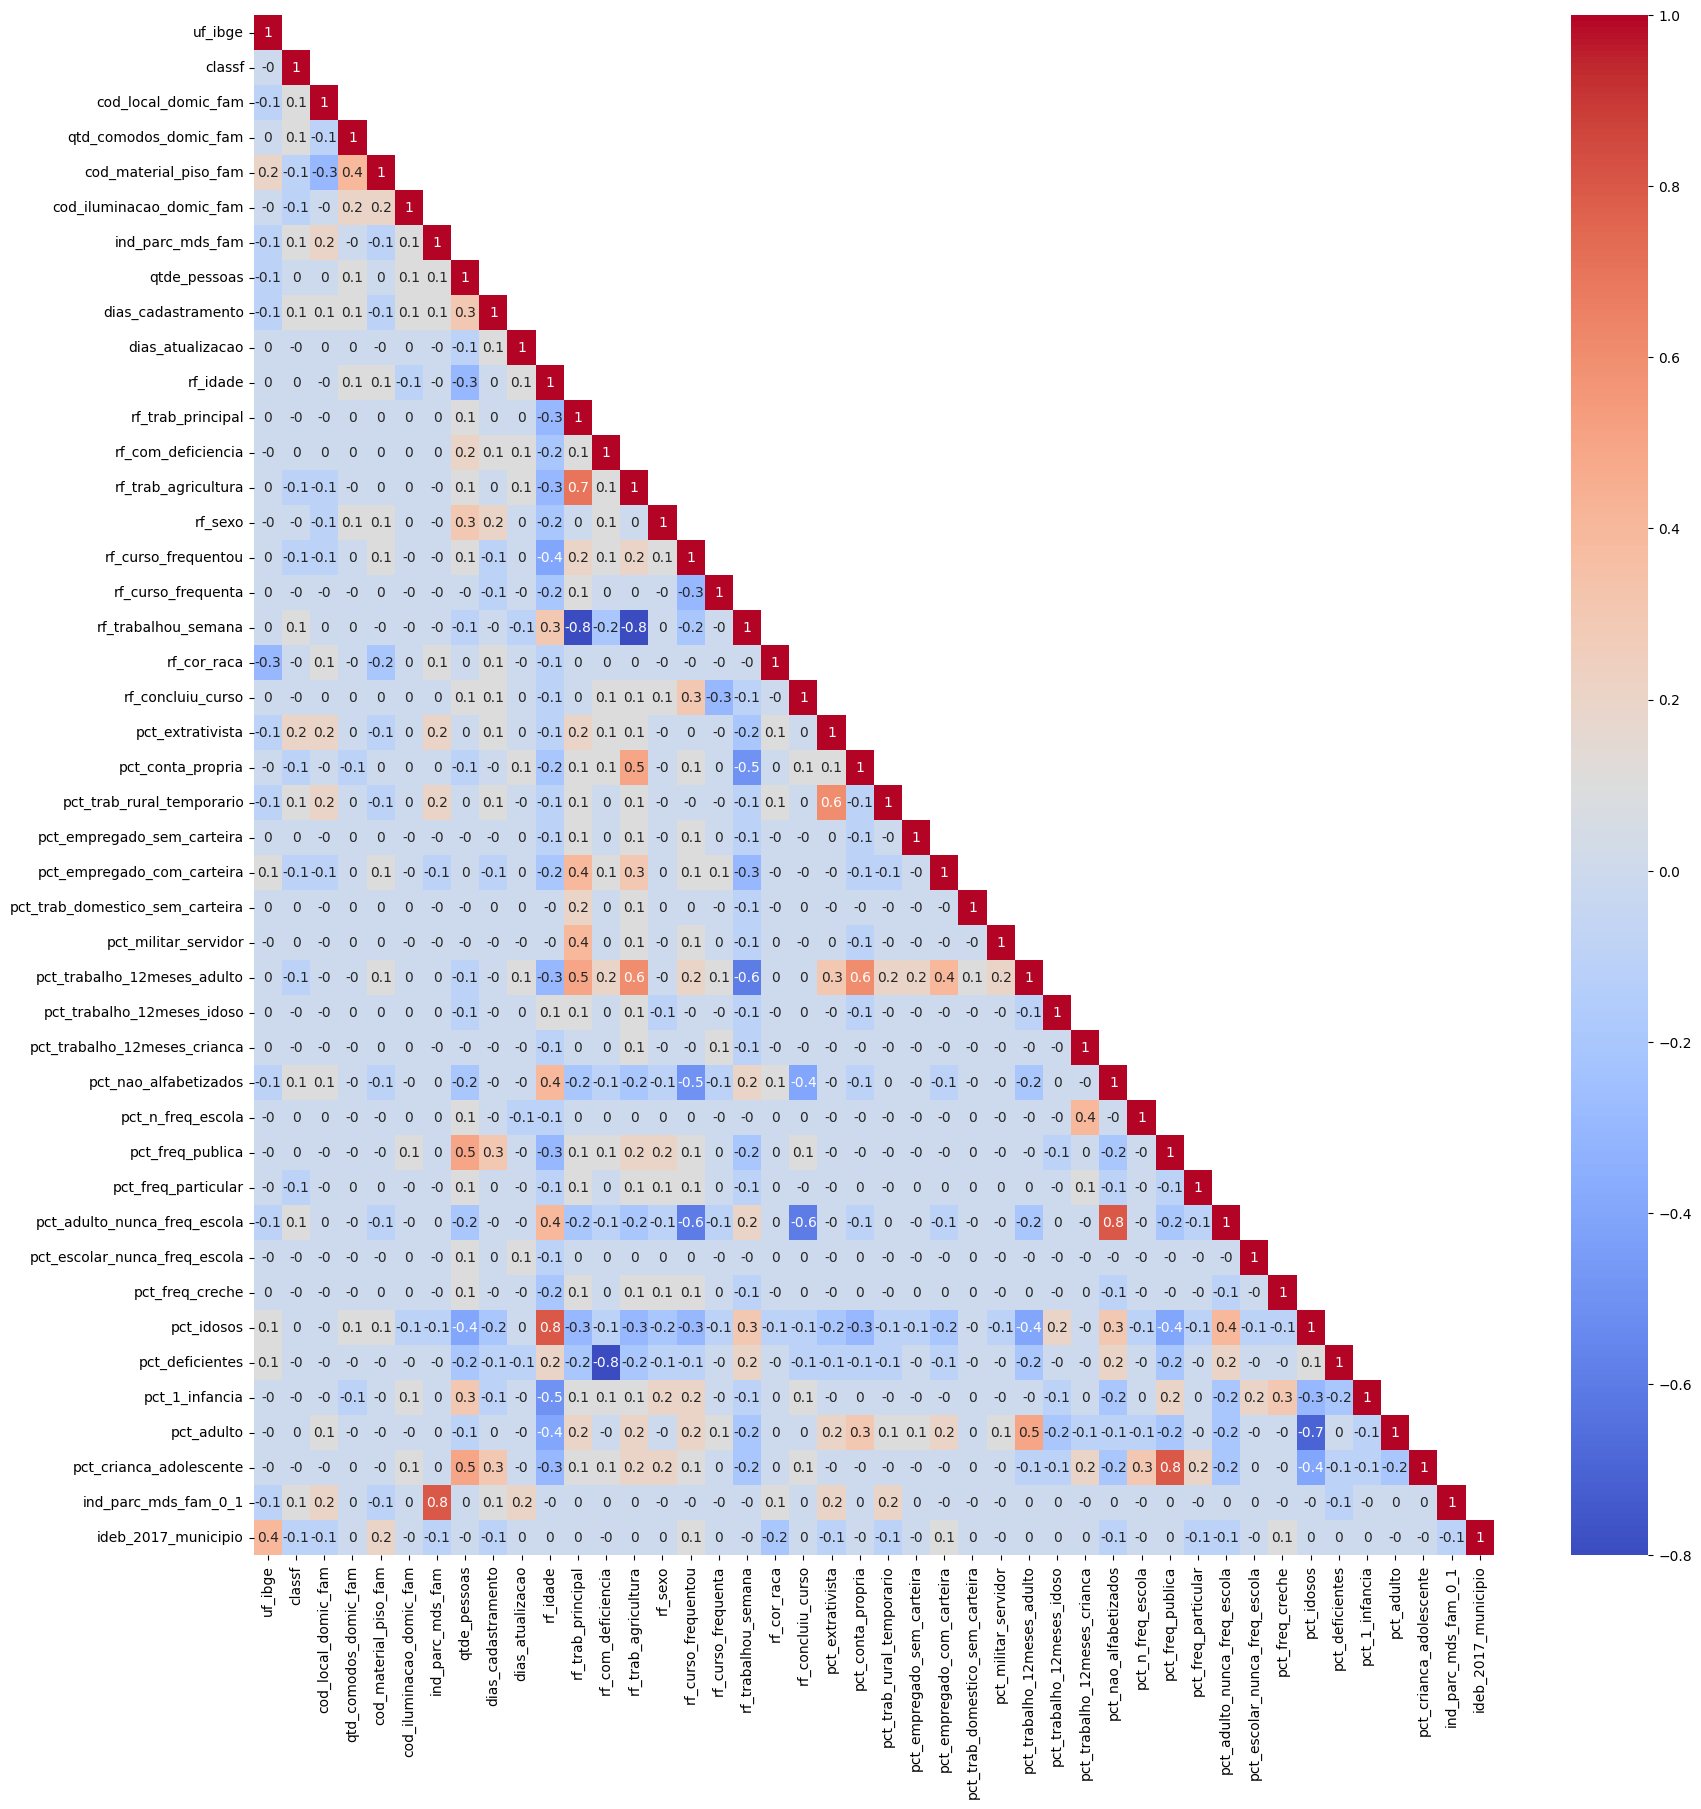

In [7]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [8]:
import numpy as np
import pandas as pd

# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        # Evita a auto-correlacão (corr = 1)
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")


Correlação forte entre ind_parc_mds_fam_0_1 e ind_parc_mds_fam: 0.8030947423626631
Correlação forte entre pct_adulto_nunca_freq_escola e pct_nao_alfabetizados: 0.81289494494895
Correlação forte entre pct_nao_alfabetizados e pct_adulto_nunca_freq_escola: 0.81289494494895
Correlação forte entre ind_parc_mds_fam e ind_parc_mds_fam_0_1: 0.8030947423626631


In [9]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_adulto_nunca_freq_escola', 'ind_parc_mds_fam'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,3,3290.0,510,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,8,1774.0,101,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2,1966.0,598,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2,812.0,285,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,3,5772.0,591,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [10]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_com_deficiencia', 'rf_trab_agricultura', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
    

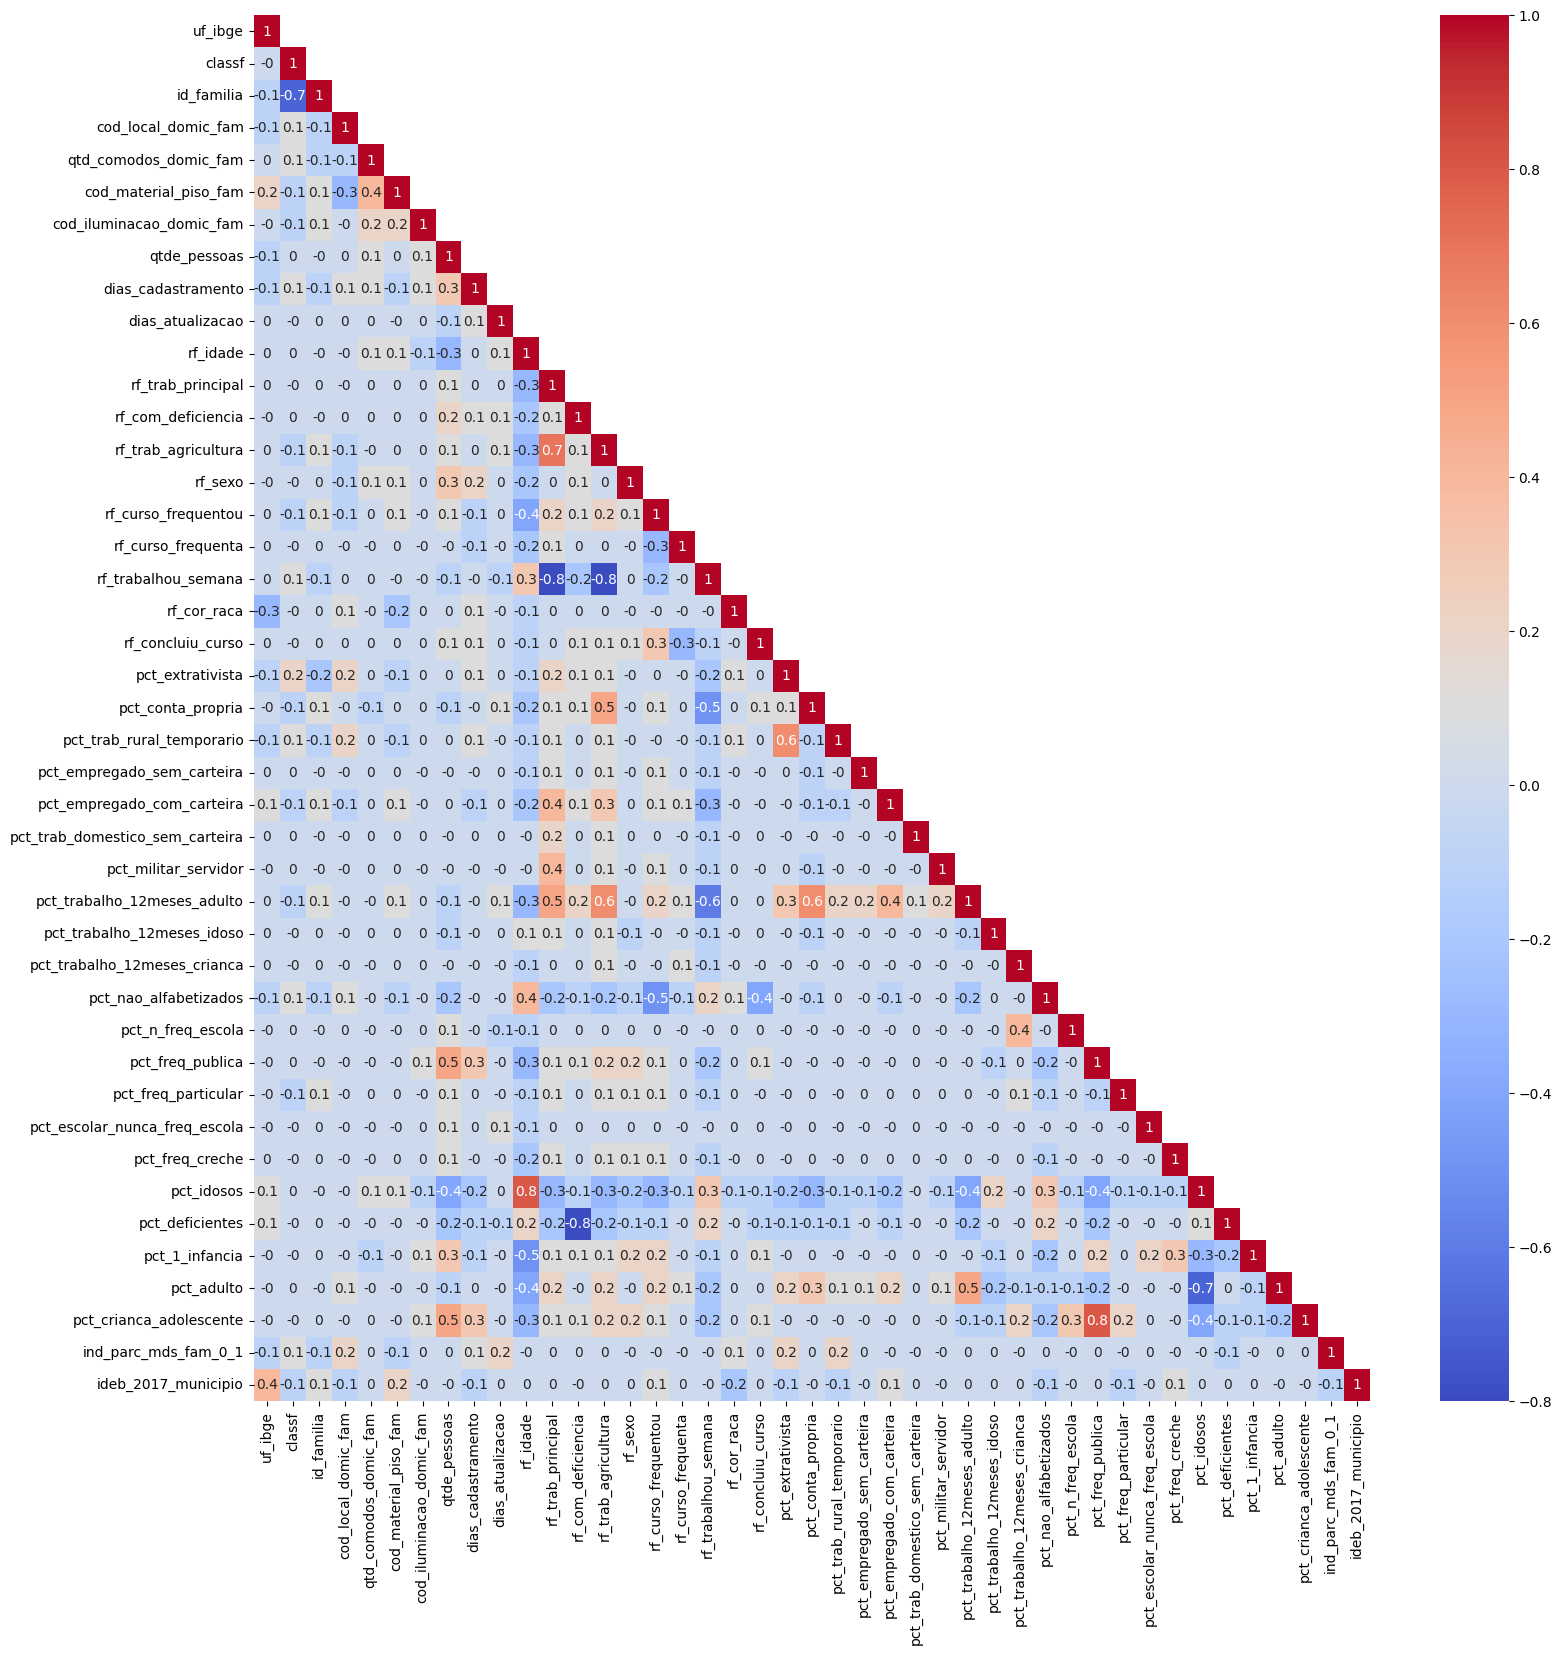

In [11]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'rf_idade', 'rf_trab_principal',
       'rf_com_deficiencia', 'rf_trab_agricultura', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [12]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.7
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: classf e id_familia, Correlação: 0.73
Colunas: rf_idade e pct_idosos, Correlação: 0.76
Colunas: rf_trab_principal e rf_trab_agricultura, Correlação: 0.73
Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.79
Colunas: rf_com_deficiencia e pct_deficientes, Correlação: 0.84
Colunas: rf_trab_agricultura e rf_trabalhou_semana, Correlação: 0.81
Colunas: pct_freq_publica e pct_crianca_adolescente, Correlação: 0.80
Colunas: pct_idosos e pct_adulto, Correlação: 0.71


In [13]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['rf_com_deficiencia', 'rf_trab_agricultura'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,3,3290.0,510,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,8,1774.0,101,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2,1966.0,598,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2,812.0,285,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,3,5772.0,591,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [14]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1'

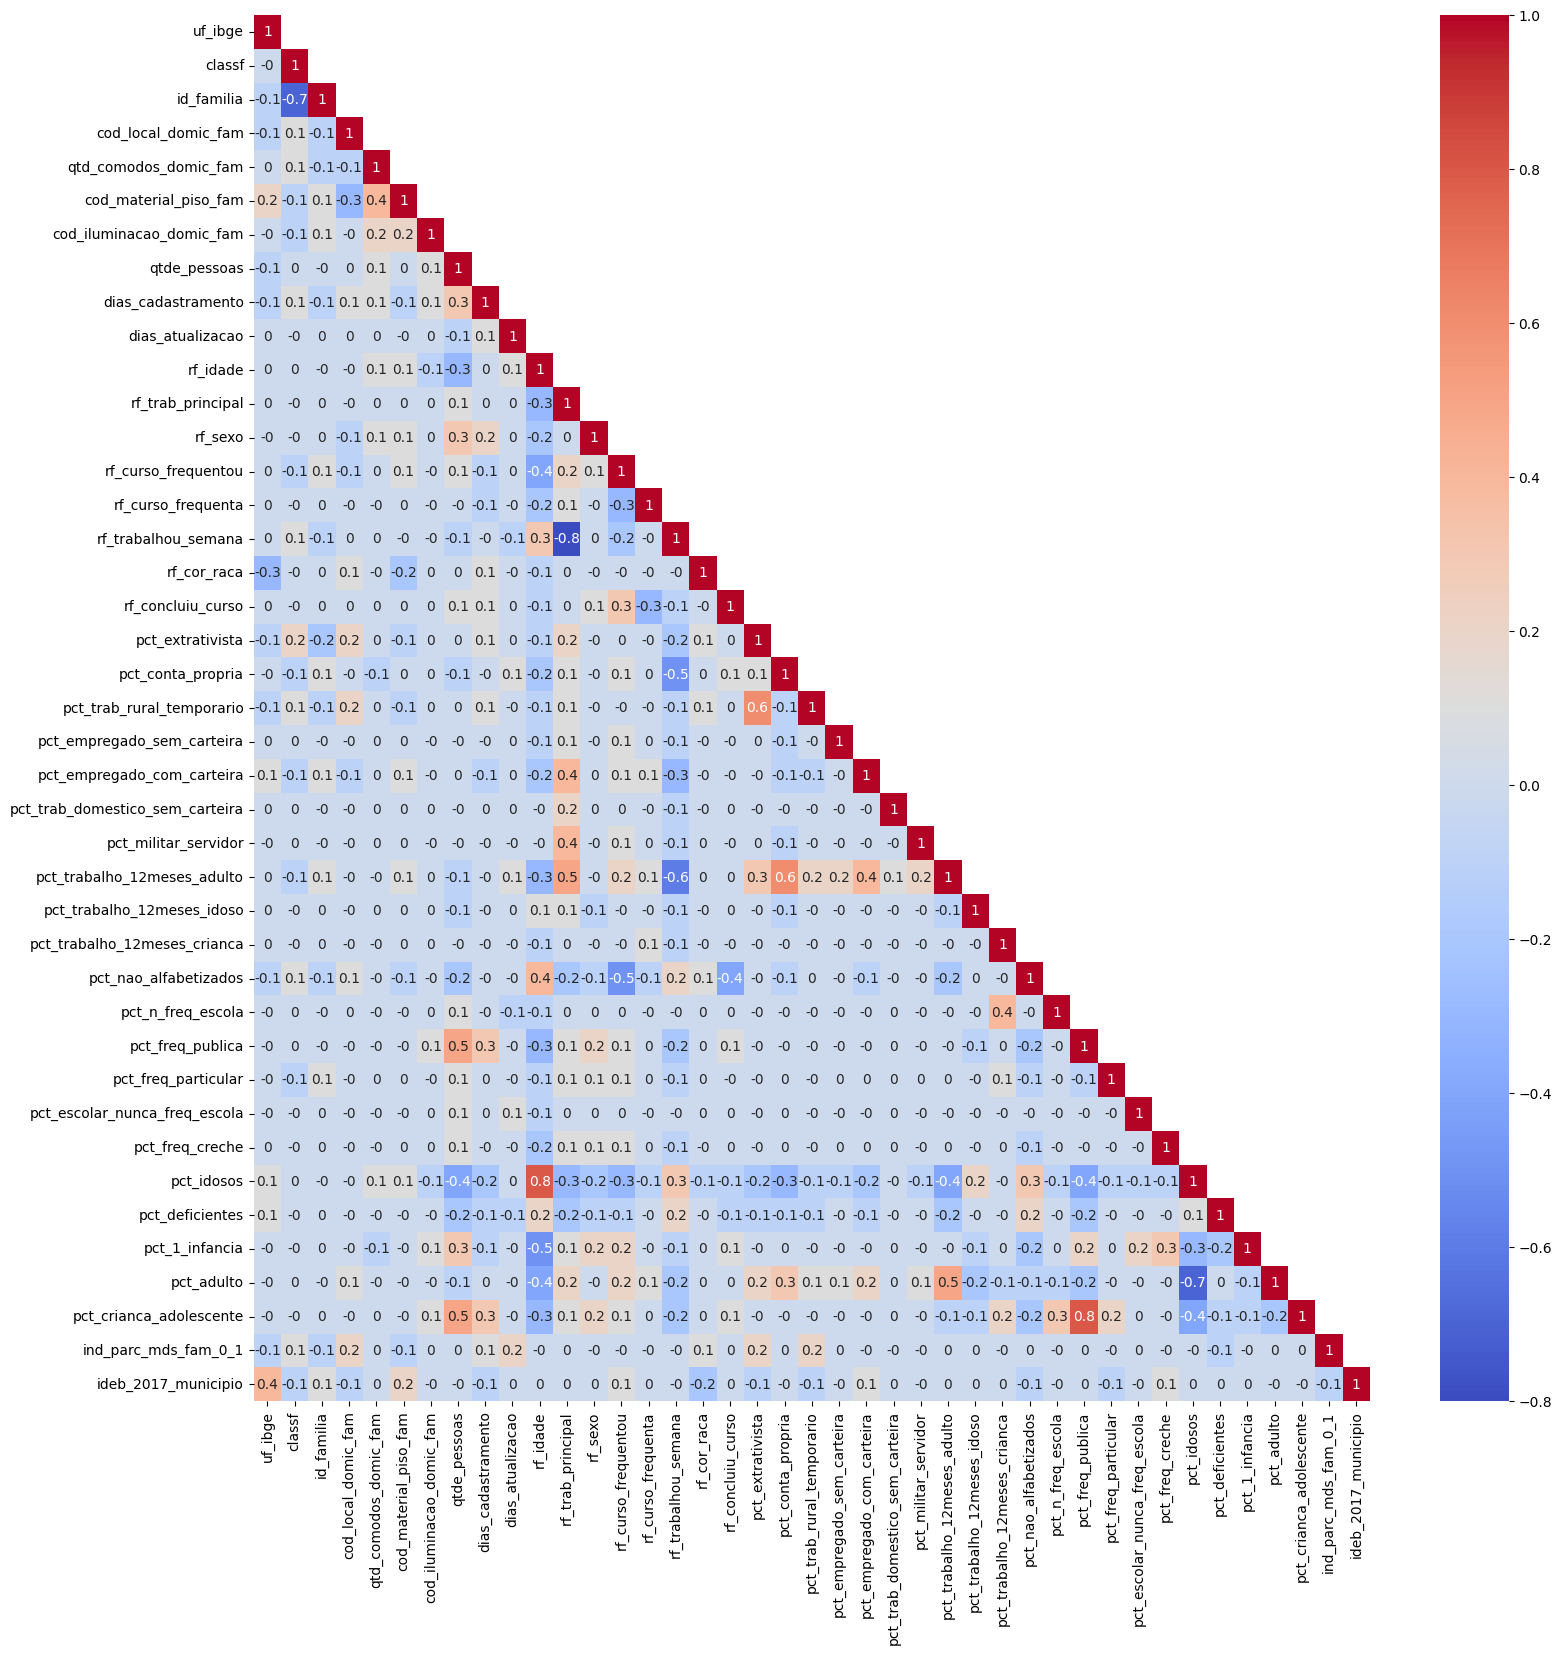

In [15]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'rf_idade', 'rf_trab_principal',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [16]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.7
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: classf e id_familia, Correlação: 0.73
Colunas: rf_idade e pct_idosos, Correlação: 0.76
Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.79
Colunas: pct_freq_publica e pct_crianca_adolescente, Correlação: 0.80
Colunas: pct_idosos e pct_adulto, Correlação: 0.71


In [17]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,3,3290.0,510,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,8,1774.0,101,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2,1966.0,598,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2,812.0,285,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,3,5772.0,591,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [18]:
df_balanceado.shape

(96792, 42)

# Fazendo uma amostra de 10mil

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Definindo a amostra
sample_size = 10000

# Fazendo a amostragem estratificada
df_sample, _ = train_test_split(df_balanceado, 
                                 train_size=sample_size, 
                                 stratify=df_balanceado['classe_renda'], 
                                 random_state=42)

# Mostrando a amostra resultante
print(df_sample['classe_renda'].value_counts())


classe_renda
2    3387
0    3315
1    3298
Name: count, dtype: int64


In [20]:
df_sample.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
79713,52,1,4353387,1.0,5.0,2.0,1.0,1,452.0,452,...,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.000000,0.0,5.9
36046,27,1,4569986,1.0,5.0,2.0,1.0,3,1111.0,237,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.666667,0.333333,0.0,5.0
93096,35,2,2618787,1.0,5.0,5.0,1.0,2,1802.0,346,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,6.2
78642,51,1,4301802,1.0,5.0,5.0,2.0,2,28.0,28,...,0.0,0.0,0.0,0.0,0.000000,0.5,0.500000,0.000000,0.0,5.6
23558,31,3,2055304,1.0,4.0,5.0,1.0,2,2393.0,851,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0,6.3


In [21]:
df_sample.shape

(10000, 42)

In [22]:
df_sample.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1'

## Criando uma função de normalização das colunas quantitativas

In [23]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_balanceado[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: uf_ibge
Valores únicos: [15 13 29 28 33 41 35 26 25 21 22 23 43 32 31 27 52 24 16 50 17 14 53 11
 42 12 51]

Coluna: classf
Valores únicos: [1 3 2]

Coluna: cod_local_domic_fam
Valores únicos: [1. 2. 9.]

Coluna: qtd_comodos_domic_fam
Valores únicos: [ 2.  4.  5. -1.  3.  1.  6.  7.  8.  9. 11. 20.  0. 10. 13. 12. 14. 16.
 15. 18.]

Coluna: cod_material_piso_fam
Valores únicos: [ 2.  5. -1.  4.  1.  3.  7.  6.]

Coluna: cod_iluminacao_domic_fam
Valores únicos: [ 1. -1.  2.  3.  6.  5.  4.]

Coluna: qtde_pessoas
Valores únicos: [ 3  8  2  1  5  6  4  7 11 10  9 12 13]

Coluna: dias_cadastramento
Valores únicos: [3290. 1774. 1966. ...  765. 5094.  163.]

Coluna: dias_atualizacao
Valores únicos: [ 510  101  598 ...  190  218 1269]

Coluna: classe_renda
Valores únicos: [0 1 2]

Coluna: rf_idade
Valores únicos: [ 44  38  31  55  51  27  46  22  30  21  23  19  63  20  29  25  32  34
  33  28  48  52  67  43  26  47  15  50  17  37  41  59  36  24  49  58
  39  35  57  40  45  54  56

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def normalize_numerical_columns(df, numerical_cols):
    # Inicializar o MinMaxScaler para normalização entre 0 e 1
    scaler = MinMaxScaler()

    # Criar um Pipeline para normalizar as colunas numéricas
    pipeline = Pipeline(steps=[
        ('scaler', scaler)
    ])
    
    # Aplicar o Pipeline apenas nas colunas numéricas
    df[numerical_cols] = pipeline.fit_transform(df[numerical_cols])

    return df

# Uso n
numerical_cols = ['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio'] 


In [25]:
# Chamando a função
df_sample = normalize_numerical_columns(df_sample, numerical_cols)
df_sample.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
79713,0.976190,0.0,4353387,0.0,0.315789,0.375,0.285714,0.0,0.066493,0.292339,...,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.000000,0.0,0.683168
36046,0.380952,0.0,4569986,0.0,0.315789,0.375,0.285714,0.2,0.167227,0.147849,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.666667,0.333333,0.0,0.594059
93096,0.571429,0.5,2618787,0.0,0.315789,0.750,0.285714,0.1,0.272852,0.221102,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.712871
78642,0.952381,0.0,4301802,0.0,0.315789,0.750,0.428571,0.1,0.001681,0.007392,...,0.0,0.0,0.0,0.0,0.000000,0.5,0.500000,0.000000,0.0,0.653465
23558,0.476190,1.0,2055304,0.0,0.263158,0.750,0.285714,0.1,0.363192,0.560484,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0,0.722772


# Seleção das variáveis independentes (Features)

In [26]:
# Exibir todas as colunas do DataFrame final
print(df_sample.columns.tolist())

['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam', 'qtd_comodos_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal', 'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1', 'ideb_2017_municipio']


In [27]:
# Selecionando as variáveis que serão utilizadas para o modelo
X_sample = df_sample[[ 'uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam', 'qtd_comodos_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 
                      'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'rf_idade', 'rf_trab_principal', 'rf_sexo', 'rf_curso_frequentou', 
                      'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
                      'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 
                      'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 
                      'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 
                      'ind_parc_mds_fam_0_1', 'ideb_2017_municipio']]
y_sample = df_sample['classe_renda']

# Exibindo as informações de X
print('X_sample =', X_sample.shape)
X_sample.head()

X_sample = (10000, 41)


,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
79713,0.976190,0.0,4353387,0.0,0.315789,0.375,0.285714,0.0,0.066493,0.292339,...,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.000000,0.0,0.683168
36046,0.380952,0.0,4569986,0.0,0.315789,0.375,0.285714,0.2,0.167227,0.147849,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.666667,0.333333,0.0,0.594059
93096,0.571429,0.5,2618787,0.0,0.315789,0.750,0.285714,0.1,0.272852,0.221102,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.712871
78642,0.952381,0.0,4301802,0.0,0.315789,0.750,0.428571,0.1,0.001681,0.007392,...,0.0,0.0,0.0,0.0,0.000000,0.5,0.500000,0.000000,0.0,0.653465
23558,0.476190,1.0,2055304,0.0,0.263158,0.750,0.285714,0.1,0.363192,0.560484,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0,0.722772


In [28]:
# Verificar se há algum valor nulo no dataframe X
nulos = X_sample.isnull().sum()

# Exibir apenas as colunas que têm valores nulos
nulos_com_valores = nulos[nulos > 0]

print("Colunas com valores nulos e suas quantidades:")
print(nulos_com_valores)


Colunas com valores nulos e suas quantidades:
Series([], dtype: int64)


In [29]:
y_sample.head()

79713    2
36046    1
93096    2
78642    2
23558    0
Name: classe_renda, dtype: int64

In [30]:
X_sample.describe()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
count,10000.000000,10000.00000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.468850,0.69370,2.710529e+06,0.02305,0.280153,0.566612,0.308957,0.14598,0.337140,0.277748,...,0.013516,0.006213,0.010508,0.227610,0.096398,0.103010,0.514175,0.155205,0.099200,0.646111
std,0.225931,0.39629,1.540588e+06,0.06801,0.092789,0.219040,0.130283,0.13690,0.304338,0.226811,...,0.075783,0.047130,0.061485,0.391815,0.248570,0.185658,0.352454,0.226861,0.298945,0.096276
min,0.000000,0.00000,2.680000e+02,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309524,0.50000,1.355231e+06,0.00000,0.263158,0.375000,0.285714,0.00000,0.065156,0.098790,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.574257
50%,0.476190,1.00000,2.766383e+06,0.00000,0.315789,0.750000,0.285714,0.10000,0.232651,0.227151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.653465
75%,0.571429,1.00000,4.058526e+06,0.00000,0.315789,0.750000,0.285714,0.20000,0.575512,0.382560,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.200000,1.000000,0.333333,0.000000,0.722772
max,1.000000,1.00000,5.290061e+06,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000


In [31]:
y_sample.describe()

count    10000.000000
mean         1.007200
std          0.818667
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: classe_renda, dtype: float64

In [32]:
y_sample.value_counts()

classe_renda
2    3387
0    3315
1    3298
Name: count, dtype: int64

In [33]:
y_sample.isnull().sum()

0

In [34]:
# Dividir os dados em treino e teste
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

In [35]:
y_sample_train.describe()

count    8000.000000
mean        1.007250
std         0.818707
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: classe_renda, dtype: float64

# Estimação padrão

In [36]:
# ESTIMAÇÃO PADRÃO

from matplotlib.pylab import f
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando os modelos
models = {
    'Logistic': LogisticRegression(max_iter=2000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True)
}

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_sample_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_sample_test)  # Aplica a transformação nos dados de teste
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_scaled, y_sample_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_scaled, y_sample_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_sample_test, y_pred))
    print("Acurácia:", accuracy_score(y_sample_test, y_pred))
    print("-" * 50)  # Separador entre os modelos

Avaliando modelo: Logistic
Scores de validação cruzada: [0.705    0.684375 0.69375  0.718125 0.705625]
Acurácia média: 0.701375
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       663
           1       0.65      0.50      0.57       660
           2       0.74      0.80      0.77       677

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000

Acurácia: 0.703
--------------------------------------------------
Avaliando modelo: KNN
Scores de validação cruzada: [0.64375  0.610625 0.6325   0.659375 0.6525  ]
Acurácia média: 0.6397499999999999
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       663
           1       0.57      0.49      0.53       660
           2       0.76      0.70      0.73       677

    accuracy     

# Comparando os diversos modelos usando toda a base amostral

In [37]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,3,3290.0,510,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,8,1774.0,101,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2,1966.0,598,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2,812.0,285,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,3,5772.0,591,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [38]:
df_balanceado.shape

(96792, 42)

## Chamando a função para normalização das colunas quantitativas

In [39]:
# Chamando a função de normalização das colunas quantitativas
df_balanceado = normalize_numerical_columns(df_balanceado, numerical_cols)

In [40]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,0.095238,0.0,4736936,0.000,0.142857,0.375,0.285714,0.166667,0.500306,0.331317,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,0.574257
1,0.047619,1.0,2562870,0.000,0.238095,0.375,0.285714,0.583333,0.268572,0.056452,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,0.554455
2,0.428571,1.0,1843654,0.125,0.238095,0.375,0.285714,0.083333,0.297921,0.390457,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,0.495050
3,0.404762,1.0,1946851,0.125,0.285714,0.375,0.285714,0.083333,0.121522,0.180108,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,0.514851
4,0.523810,1.0,4194650,0.000,0.285714,0.750,0.285714,0.166667,0.879700,0.385753,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,0.554455


In [41]:
# Verificar a presença de valores NaN
print(df_balanceado.isnull().sum().sum())

1


In [42]:
df_balanceado = df_balanceado.dropna()

In [43]:
# Verificar a presença de valores NaN
print(df_balanceado.isnull().sum().sum())

0


In [44]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1'

## Criando o dataframe X e a variável target y

In [45]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_balanceado[[ 'uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'rf_idade', 'rf_trab_principal',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio']]
y = df_balanceado['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 40)


,uf_ibge,classf,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,rf_idade,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,0.095238,0.0,0.000,0.142857,0.375,0.285714,0.166667,0.500306,0.331317,0.294118,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,0.574257
1,0.047619,1.0,0.000,0.238095,0.375,0.285714,0.583333,0.268572,0.056452,0.235294,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,0.554455
2,0.428571,1.0,0.125,0.238095,0.375,0.285714,0.083333,0.297921,0.390457,0.166667,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,0.495050
3,0.404762,1.0,0.125,0.285714,0.375,0.285714,0.083333,0.121522,0.180108,0.401961,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,0.514851
4,0.523810,1.0,0.000,0.285714,0.750,0.285714,0.166667,0.879700,0.385753,0.362745,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,0.554455


In [46]:
# Verificar a presença de valores NaN
print(X.isnull().sum())

uf_ibge                            0
classf                             0
cod_local_domic_fam                0
qtd_comodos_domic_fam              0
cod_material_piso_fam              0
cod_iluminacao_domic_fam           0
qtde_pessoas                       0
dias_cadastramento                 0
dias_atualizacao                   0
rf_idade                           0
rf_trab_principal                  0
rf_sexo                            0
rf_curso_frequentou                0
rf_curso_frequenta                 0
rf_trabalhou_semana                0
rf_cor_raca                        0
rf_concluiu_curso                  0
pct_extrativista                   0
pct_conta_propria                  0
pct_trab_rural_temporario          0
pct_empregado_sem_carteira         0
pct_empregado_com_carteira         0
pct_trab_domestico_sem_carteira    0
pct_militar_servidor               0
pct_trabalho_12meses_adulto        0
pct_trabalho_12meses_idoso         0
pct_trabalho_12meses_crianca       0
p

In [47]:
y.tail()

96787    2
96788    2
96789    2
96790    2
96791    2
Name: classe_renda, dtype: int64

In [48]:
y.value_counts()

classe_renda
2    32786
0    32089
1    31916
Name: count, dtype: int64

In [49]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ESTIMAÇÃO PADRÃO

In [50]:
# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True)
}

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_scaled, y_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_scaled, y_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos

Avaliando modelo: Decision Tree
Scores de validação cruzada: [0.65241816 0.64647769 0.65452667 0.64710061 0.64806922]
Acurácia média: 0.649718469639053
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      6418
           1       0.56      0.56      0.56      6383
           2       0.72      0.72      0.72      6558

    accuracy                           0.65     19359
   macro avg       0.65      0.65      0.65     19359
weighted avg       0.65      0.65      0.65     19359

Acurácia: 0.6512216540110543
--------------------------------------------------
Avaliando modelo: Random Forest
Scores de validação cruzada: [0.74417253 0.74501195 0.74912824 0.74338112 0.74602867]
Acurácia média: 0.745544502331431
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      6418
           1       0.67      0.66      0.67      6383
           2    

# 1. Definição dos Modelos

In [51]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [6, 7, 9],
            'classifier__min_samples_split': [2, 3, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
     }
}

# 2. Treinamento e Busca de Hiperparâmetros

In [52]:
from sklearn.model_selection import GridSearchCV


In [53]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 9, 'classifier__min_samples_split': 3}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 350}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 600, 'classifier__learning_rate': 0.1}


# 3. Avaliação do Modelo

In [54]:
from sklearn.metrics import accuracy_score, f1_score

In [55]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo: DecisionTree
  F1 Score: 0.71
  Acurácia: 0.71
Modelo: RandomForest
  F1 Score: 0.75
  Acurácia: 0.75
Modelo: XGBoost
  F1 Score: 0.75
  Acurácia: 0.75
Modelo: CatBoost
  F1 Score: 0.75
  Acurácia: 0.75


#### Estimação padrão

# 4. Geração de Matriz de Confusão

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

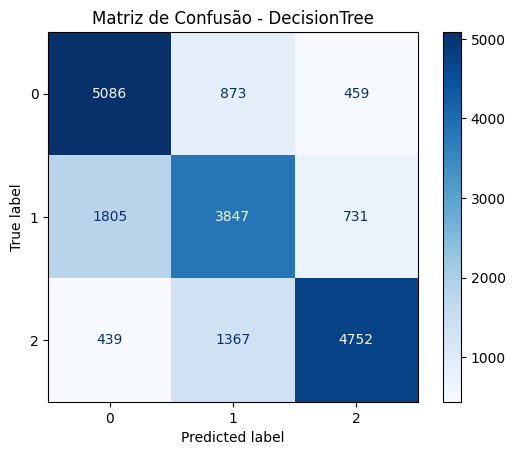

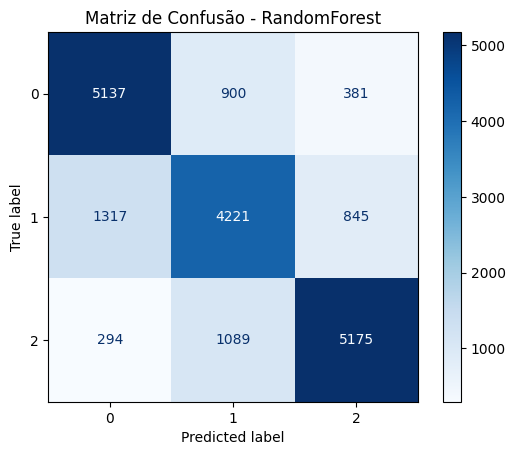

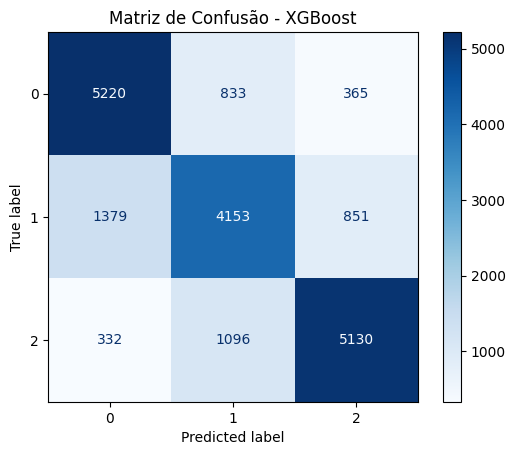

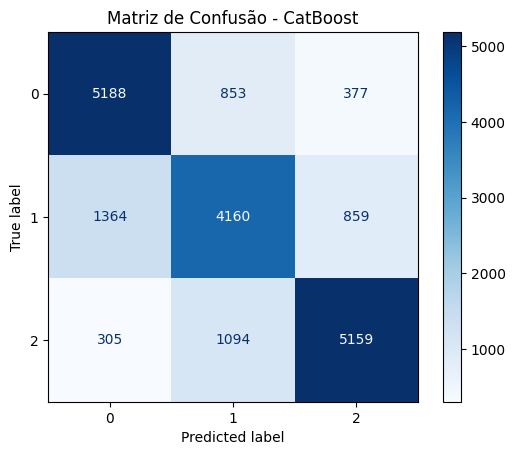

In [57]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# 5. Análise da Importância das Features

In [58]:
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

## Carregando as features em um dataframe e gerando gráfico apenas com as features com importância > 0.0

In [59]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['DecisionTree'], X_test, y_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)


                     Feature  Importância  Desvio_Padrao        Modelo
0                    uf_ibge     0.013740       0.000741  DecisionTree
1                     classf     0.000585       0.000247  DecisionTree
2        cod_local_domic_fam     0.000585       0.000024  DecisionTree
3      qtd_comodos_domic_fam     0.000964       0.000160  DecisionTree
4      cod_material_piso_fam     0.011037       0.000600  DecisionTree
..                       ...          ...            ...           ...
155           pct_1_infancia     0.007559       0.000877      CatBoost
156               pct_adulto     0.007163       0.000635      CatBoost
157  pct_crianca_adolescente     0.001188       0.000590      CatBoost
158     ind_parc_mds_fam_0_1     0.000172       0.000274      CatBoost
159      ideb_2017_municipio     0.001171       0.000254      CatBoost

[160 rows x 4 columns]


In [60]:
feature_importance_df.head()

,Feature,Importância,Desvio_Padrao,Modelo
0,uf_ibge,0.013740,0.000741,DecisionTree
1,classf,0.000585,0.000247,DecisionTree
2,cod_local_domic_fam,0.000585,0.000024,DecisionTree
3,qtd_comodos_domic_fam,0.000964,0.000160,DecisionTree
4,cod_material_piso_fam,0.011037,0.000600,DecisionTree


In [61]:
# Filtrar apenas as features com importância > 0
feature_importance_df = feature_importance_df[feature_importance_df['Importância'] > 0.0]

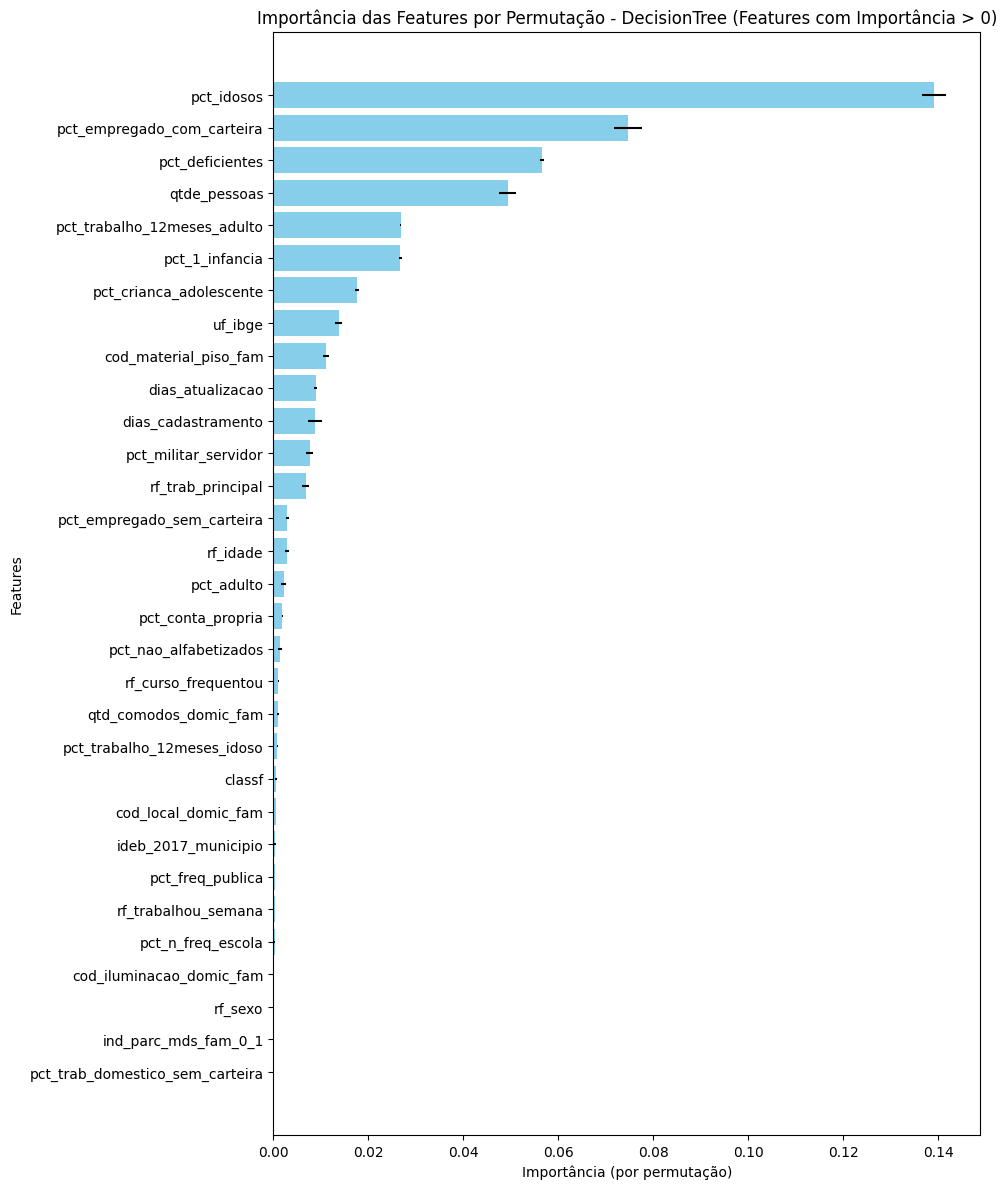

In [62]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df[feature_importance_df['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(10, 12))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



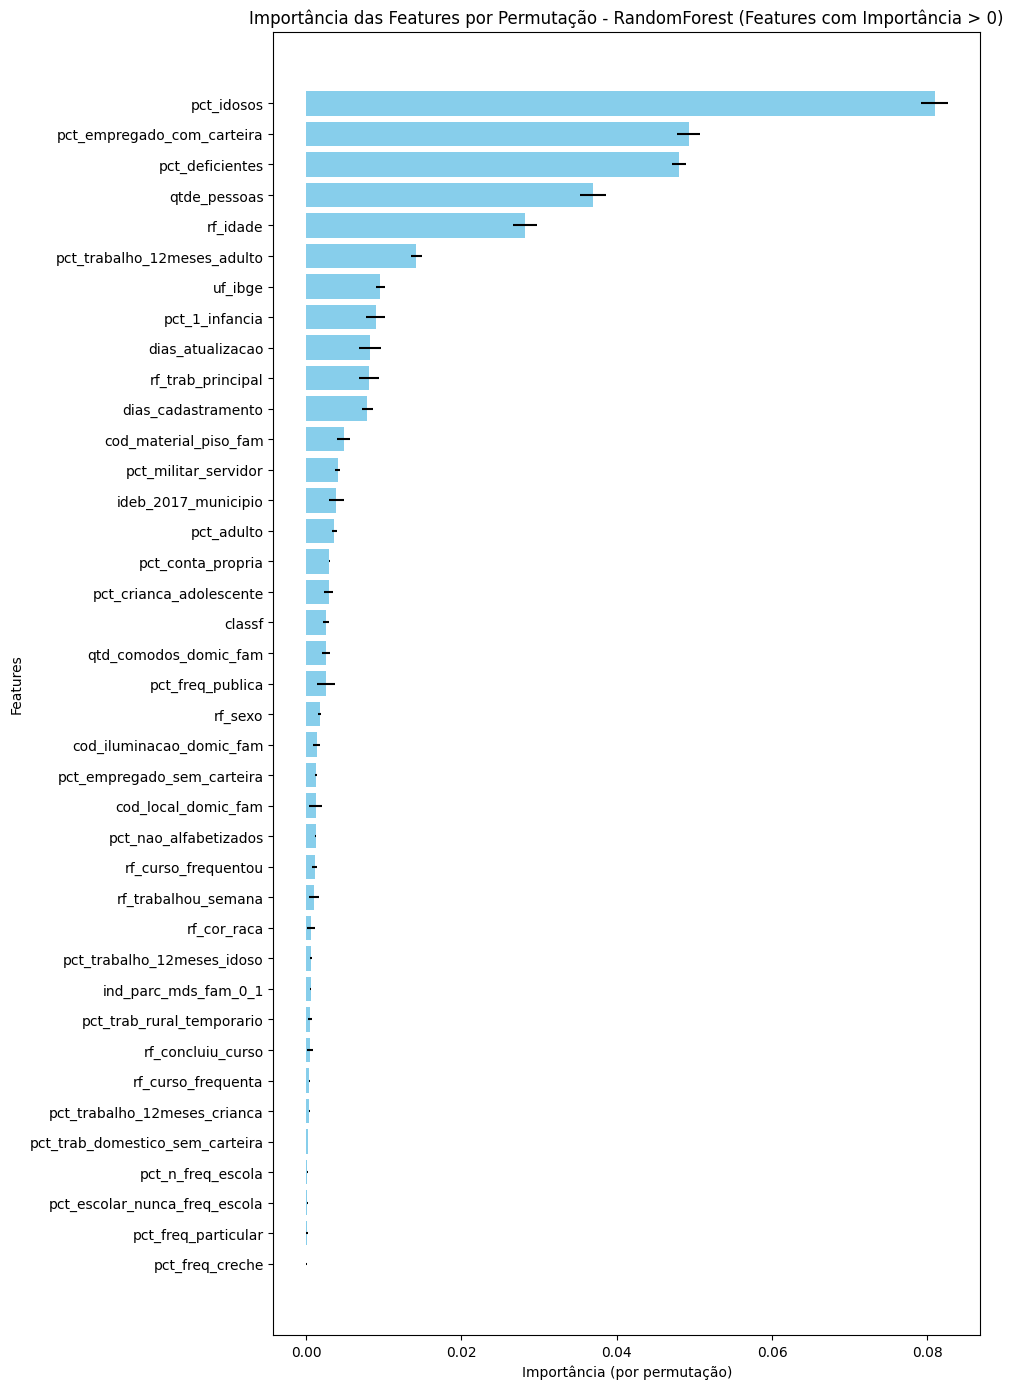

In [63]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 14))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


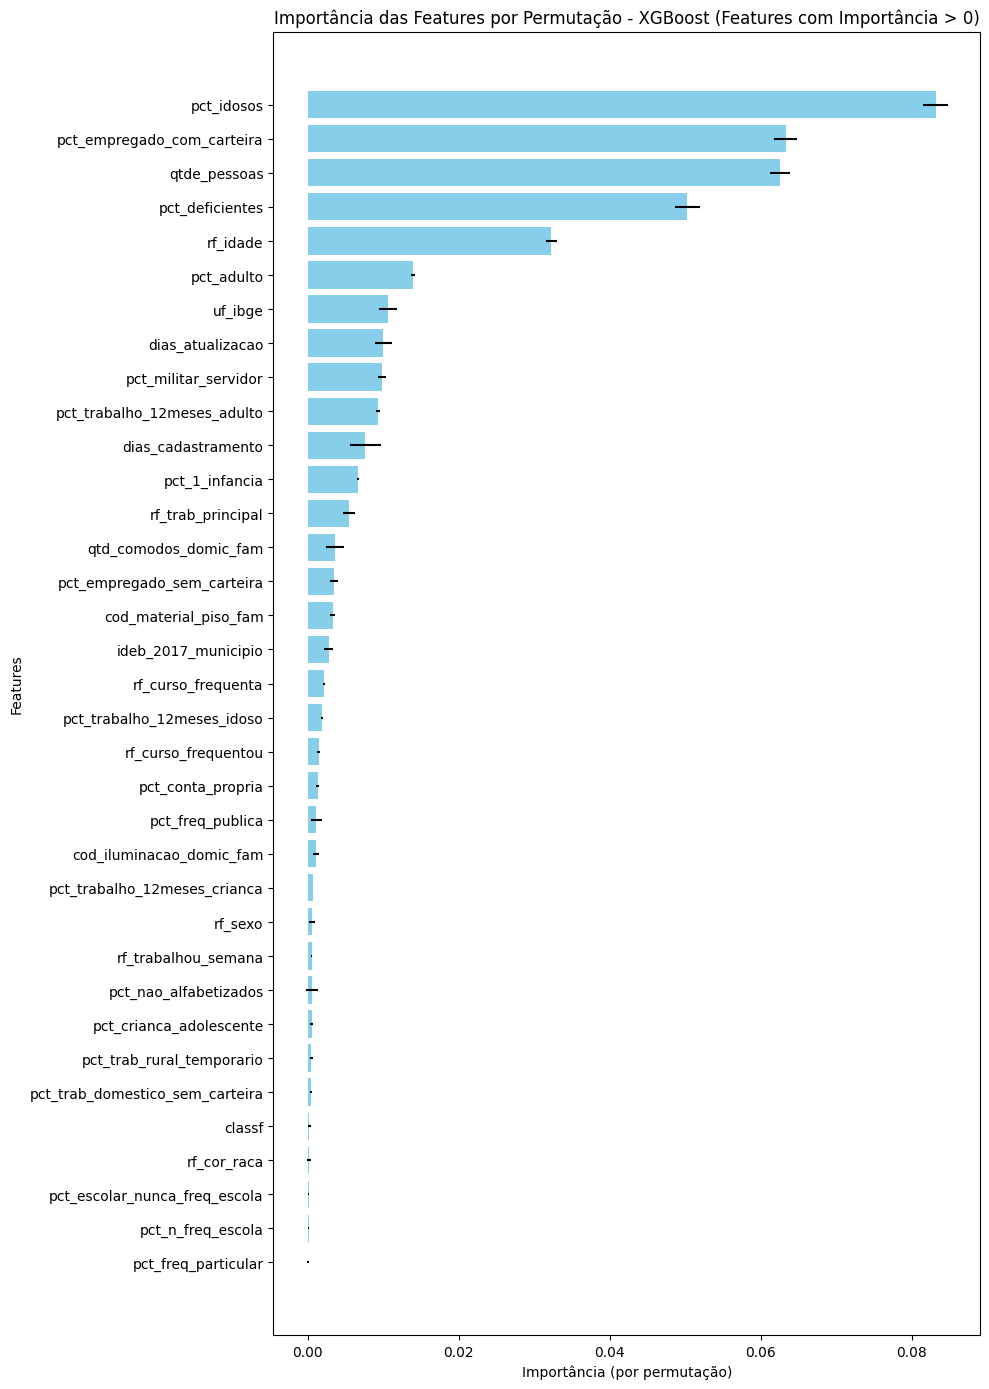

In [64]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 14))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


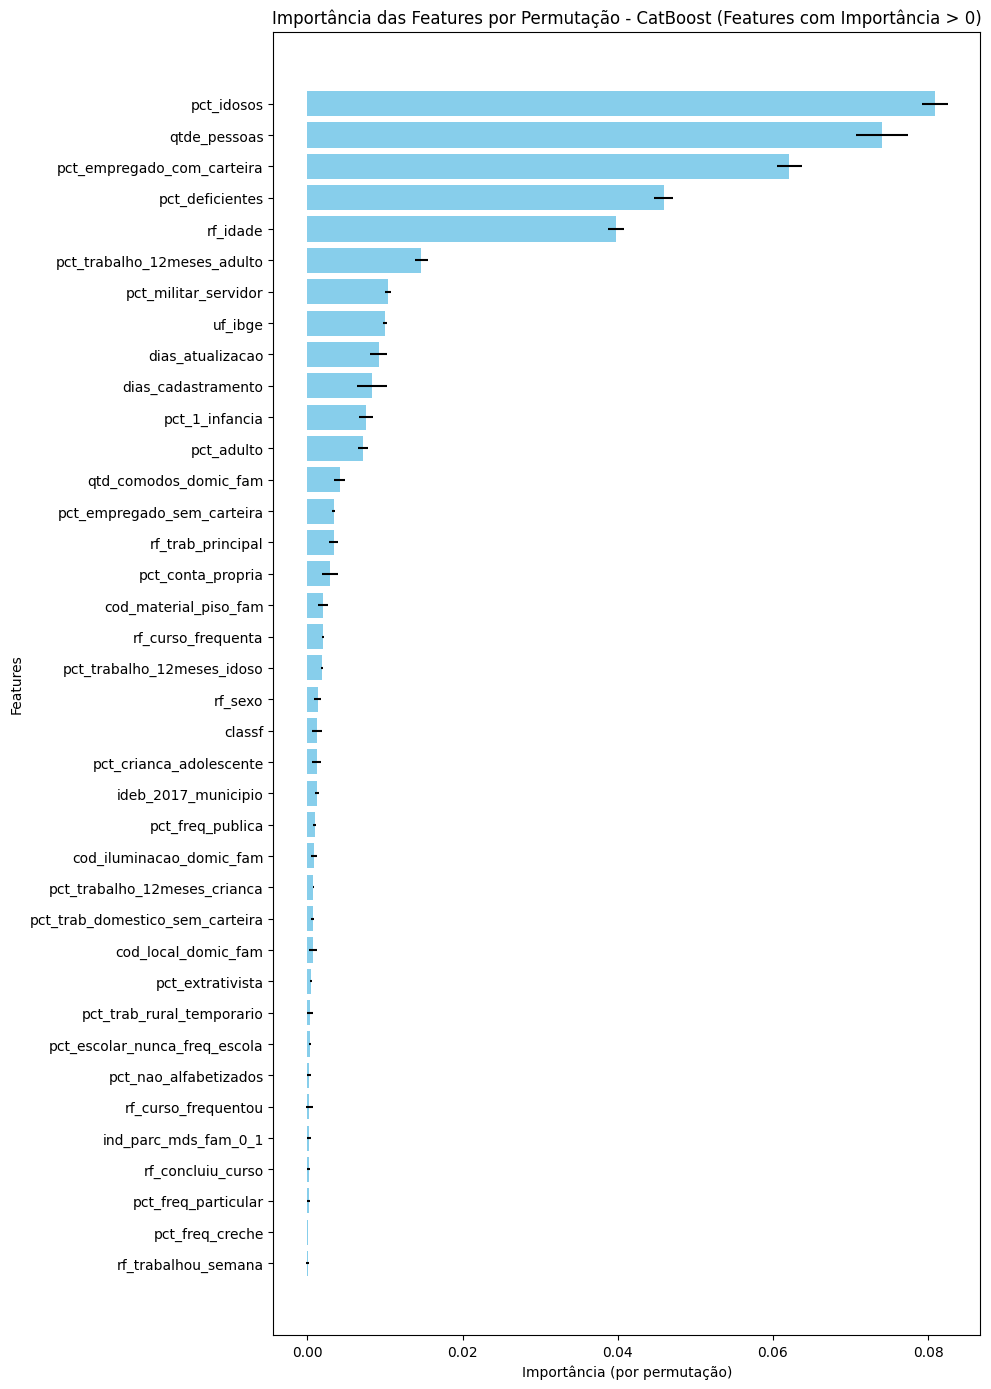

In [65]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [66]:
# Lista para armazenar os 10 principais features de cada modelo
top_10_features_per_model = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name}:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo DecisionTree:

                    Feature  Importância
                 pct_idosos     0.139057
 pct_empregado_com_carteira     0.074573
            pct_deficientes     0.056511
               qtde_pessoas     0.049297
pct_trabalho_12meses_adulto     0.026775
             pct_1_infancia     0.026723
    pct_crianca_adolescente     0.017597
                    uf_ibge     0.013740
      cod_material_piso_fam     0.011037
           dias_atualizacao     0.008868

Top 10 Features para o modelo RandomForest:

                    Feature  Importância
                 pct_idosos     0.080927
 pct_empregado_com_carteira     0.049262
            pct_deficientes     0.047988
               qtde_pessoas     0.036882
                   rf_idade     0.028187
pct_trabalho_12meses_adulto     0.014205
                    uf_ibge     0.009591
             pct_1_infancia     0.008954
           dias_atualizacao     0.008248
          rf_trab_principal     0.008110

Top 1

In [67]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]

# Exibir as features com importância maior que a mediana para cada modelo
for model_name, important_features in important_features_per_model.items():
    print(f"\nFeatures com importância maior que a mediana para o modelo {model_name}:\n")
    print(important_features.to_string(index=False))



Features com importância maior que a mediana para o modelo DecisionTree:

                    Feature  Importância
                    uf_ibge     0.013740
      cod_material_piso_fam     0.011037
               qtde_pessoas     0.049297
         dias_cadastramento     0.008764
           dias_atualizacao     0.008868
                   rf_idade     0.002858
          rf_trab_principal     0.006784
 pct_empregado_sem_carteira     0.002944
 pct_empregado_com_carteira     0.074573
       pct_militar_servidor     0.007662
pct_trabalho_12meses_adulto     0.026775
                 pct_idosos     0.139057
            pct_deficientes     0.056511
             pct_1_infancia     0.026723
    pct_crianca_adolescente     0.017597

Features com importância maior que a mediana para o modelo RandomForest:

                    Feature  Importância
                    uf_ibge     0.009591
                     classf     0.002617
      qtd_comodos_domic_fam     0.002583
      cod_material_piso_fam   

In [68]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Conjunto para consolidar todas as features importantes
consolidated_important_features = set()

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]
    
    # Adicionar as features importantes ao conjunto consolidado
    consolidated_important_features.update(important_features['Feature'])

# Exibir as features consolidadas acima da mediana para os modelos
print("Features consolidadas com importância acima da mediana em pelo menos um dos modelos:")
for feature in consolidated_important_features:
    print(feature)


Features consolidadas com importância acima da mediana em pelo menos um dos modelos:
dias_cadastramento
ideb_2017_municipio
dias_atualizacao
pct_trabalho_12meses_adulto
pct_empregado_com_carteira
pct_crianca_adolescente
pct_adulto
classf
rf_trab_principal
pct_deficientes
pct_conta_propria
pct_1_infancia
pct_idosos
qtd_comodos_domic_fam
qtde_pessoas
cod_material_piso_fam
pct_trabalho_12meses_idoso
pct_empregado_sem_carteira
rf_idade
uf_ibge
pct_militar_servidor
rf_curso_frequenta


## Retirando as features que não tiveram importância acima da mediana de cada modelo

In [69]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,0.095238,0.0,4736936,0.000,0.142857,0.375,0.285714,0.166667,0.500306,0.331317,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,0.574257
1,0.047619,1.0,2562870,0.000,0.238095,0.375,0.285714,0.583333,0.268572,0.056452,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,0.554455
2,0.428571,1.0,1843654,0.125,0.238095,0.375,0.285714,0.083333,0.297921,0.390457,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,0.495050
3,0.404762,1.0,1946851,0.125,0.285714,0.375,0.285714,0.083333,0.121522,0.180108,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,0.514851
4,0.523810,1.0,4194650,0.000,0.285714,0.750,0.285714,0.166667,0.879700,0.385753,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,0.554455


In [70]:
df_balanceado.shape

(96791, 42)

In [71]:
# Exibir todas as colunas do DataFrame final
print(df_balanceado.columns.tolist())

['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam', 'qtd_comodos_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal', 'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1', 'ideb_2017_municipio']


In [73]:
df_features_importance_1 = df_balanceado.drop(columns=[ 'cod_local_domic_fam', 'cod_iluminacao_domic_fam', 
                                                        'rf_sexo', 'rf_curso_frequentou', 'rf_trabalhou_semana', 'rf_cor_raca',
                                                       'rf_concluiu_curso', 'pct_extrativista',  'pct_trab_rural_temporario', 'pct_trab_domestico_sem_carteira', 
                                                       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 
                                                       'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 
                                                        'ind_parc_mds_fam_0_1'])

In [74]:
df_features_importance_1.head()

,uf_ibge,classf,id_familia,qtd_comodos_domic_fam,cod_material_piso_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda,rf_idade,...,pct_empregado_com_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ideb_2017_municipio
0,0.095238,0.0,4736936,0.142857,0.375,0.166667,0.500306,0.331317,0,0.294118,...,0.0,0.0,0.333333,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.574257
1,0.047619,1.0,2562870,0.238095,0.375,0.583333,0.268572,0.056452,0,0.235294,...,0.0,0.0,0.000000,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.554455
2,0.428571,1.0,1843654,0.238095,0.375,0.083333,0.297921,0.390457,0,0.166667,...,0.0,0.0,0.500000,0.0,0.0,0.000,0.000000,0.500000,0.500000,0.495050
3,0.404762,1.0,1946851,0.285714,0.375,0.083333,0.121522,0.180108,0,0.401961,...,0.0,0.0,0.500000,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.514851
4,0.523810,1.0,4194650,0.285714,0.750,0.166667,0.879700,0.385753,0,0.362745,...,0.0,0.0,0.333333,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.554455


In [75]:
df_features_importance_1.columns

Index(['uf_ibge', 'classf', 'id_familia', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_curso_frequenta', 'pct_conta_propria', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ideb_2017_municipio'],
      dtype='object')

## Dividindo as features e a variável target

In [76]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_features_importance_1[['uf_ibge', 'classf', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'rf_idade', 'rf_trab_principal',
       'rf_curso_frequenta', 'pct_conta_propria', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_idosos', 'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ideb_2017_municipio']]
y = df_features_importance_1['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 22)


,uf_ibge,classf,qtd_comodos_domic_fam,cod_material_piso_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,rf_idade,rf_trab_principal,rf_curso_frequenta,...,pct_empregado_com_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ideb_2017_municipio
0,0.095238,0.0,0.142857,0.375,0.166667,0.500306,0.331317,0.294118,0.166667,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.574257
1,0.047619,1.0,0.238095,0.375,0.583333,0.268572,0.056452,0.235294,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.554455
2,0.428571,1.0,0.238095,0.375,0.083333,0.297921,0.390457,0.166667,0.166667,0.0,...,0.0,0.0,0.500000,0.0,0.0,0.000,0.000000,0.500000,0.500000,0.495050
3,0.404762,1.0,0.285714,0.375,0.083333,0.121522,0.180108,0.401961,0.166667,0.0,...,0.0,0.0,0.500000,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.514851
4,0.523810,1.0,0.285714,0.750,0.166667,0.879700,0.385753,0.362745,0.166667,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.554455


In [77]:
X.describe()

,uf_ibge,classf,qtd_comodos_domic_fam,cod_material_piso_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,rf_idade,rf_trab_principal,rf_curso_frequenta,...,pct_empregado_com_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ideb_2017_municipio
count,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,...,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000
mean,0.467504,0.693861,0.252524,0.569256,0.121919,0.335218,0.275014,0.305648,0.103838,0.021821,...,0.059378,0.010113,0.244202,0.014321,0.224044,0.097664,0.105183,0.518294,0.152479,0.644668
std,0.226871,0.398266,0.083483,0.219581,0.112737,0.303373,0.225215,0.167192,0.174770,0.130373,...,0.172408,0.077687,0.308073,0.106178,0.387923,0.251617,0.187206,0.350732,0.226163,0.094818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309524,0.500000,0.238095,0.375000,0.000000,0.065882,0.096774,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.574257
50%,0.476190,1.000000,0.285714,0.750000,0.083333,0.231122,0.223790,0.284314,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.653465
75%,0.571429,1.000000,0.285714,0.750000,0.166667,0.571691,0.378360,0.441176,0.166667,0.000000,...,0.000000,0.000000,0.500000,0.000000,0.333333,0.000000,0.200000,1.000000,0.333333,0.722772
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000


In [78]:
X.isnull().sum().sum()

0

In [79]:
y.isnull().sum()

0

In [80]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Fazendo a avaliação usando apenas as features mais importantes

In [81]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [6, 7, 9],
            'classifier__min_samples_split': [2, 3, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [300, 350],
            'classifier__max_depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [500, 600],
            'classifier__depth': [2, 3],
            'classifier__learning_rate': [0.1]
        }
    }
}

In [82]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 9, 'classifier__min_samples_split': 3}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 350}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 600, 'classifier__learning_rate': 0.1}
Melhores hiperparâmetros para LogisticRegression: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}


In [83]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")

Modelo: DecisionTree
  F1 Score: 0.71
  Acurácia: 0.71
Modelo: RandomForest
  F1 Score: 0.75
  Acurácia: 0.75
Modelo: XGBoost
  F1 Score: 0.75
  Acurácia: 0.75
Modelo: CatBoost
  F1 Score: 0.75
  Acurácia: 0.75
Modelo: LogisticRegression
  F1 Score: 0.69
  Acurácia: 0.70


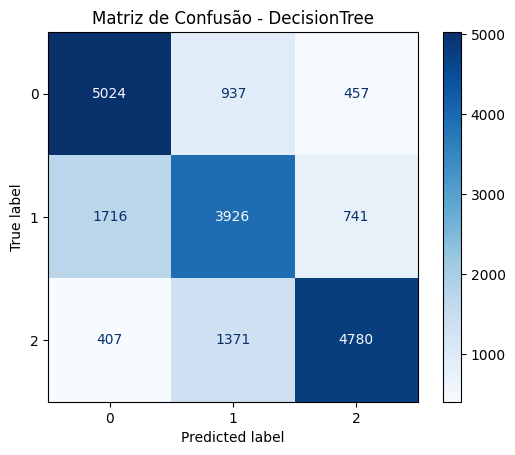

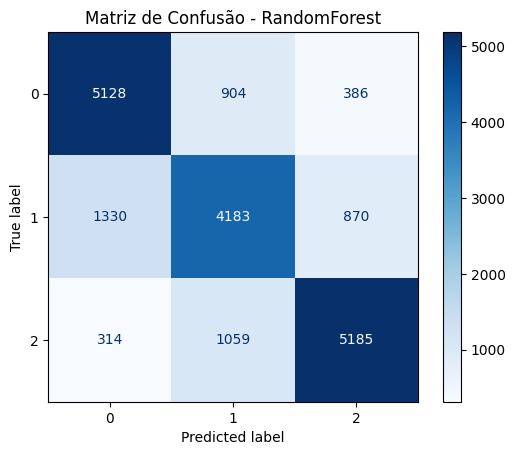

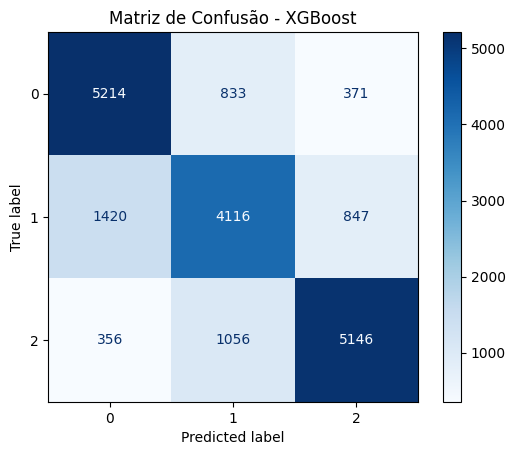

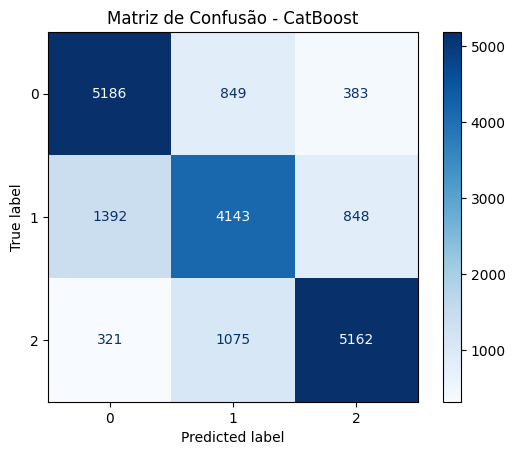

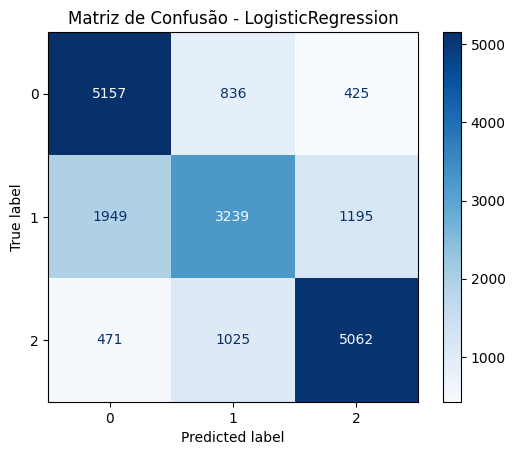

In [84]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['DecisionTree'], X_test, y_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)

In [ ]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df[feature_importance_df['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(10, 12))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree (Features com Importância)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 14))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 14))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'LogisticRegression']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - Regressão Logística (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]

# Exibir as features com importância maior que a mediana para cada modelo
for model_name, important_features in important_features_per_model.items():
    print(f"\nFeatures com importância maior que a mediana para o modelo {model_name}:\n")
    print(important_features.to_string(index=False))

In [ ]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Conjunto para consolidar todas as features importantes
consolidated_important_features = set()

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]
    
    # Adicionar as features importantes ao conjunto consolidado
    consolidated_important_features.update(important_features['Feature'])

# Exibir as features consolidadas acima da mediana para os modelos
print("Features consolidadas com importância acima da mediana em pelo menos um dos modelos:")
for feature in consolidated_important_features:
    print(feature)